In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA

In [2]:
# Load Data
customers = pd.read_csv(r"C:\Users\varun\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\varun\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\varun\Downloads\Transactions.csv")

In [3]:
# Data Overview
# Display the first few rows and basic statistics for each dataset
display(customers.head(), customers.info())
display(products.head(), products.info())
display(transactions.head(), transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


None

In [4]:
# Check for missing values
print("Missing values in Customers:", customers.isnull().sum())
print("Missing values in Products:", products.isnull().sum())
print("Missing values in Transactions:", transactions.isnull().sum())

Missing values in Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing values in Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing values in Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


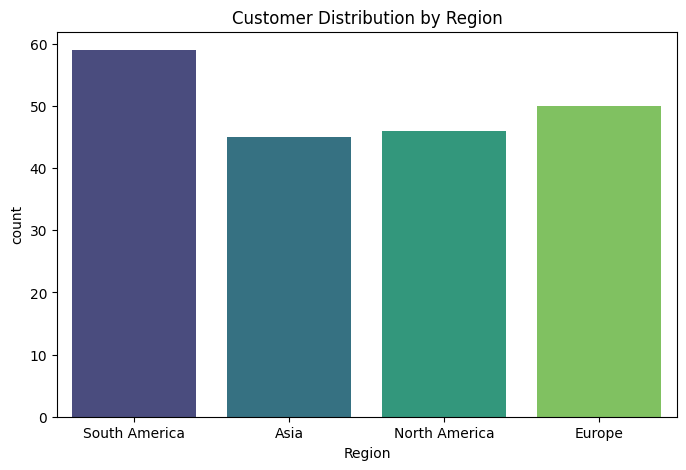

In [5]:
# --- Task 1: Exploratory Data Analysis (EDA) ---

# Example: Distribution of customers by region
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title('Customer Distribution by Region')
plt.show()

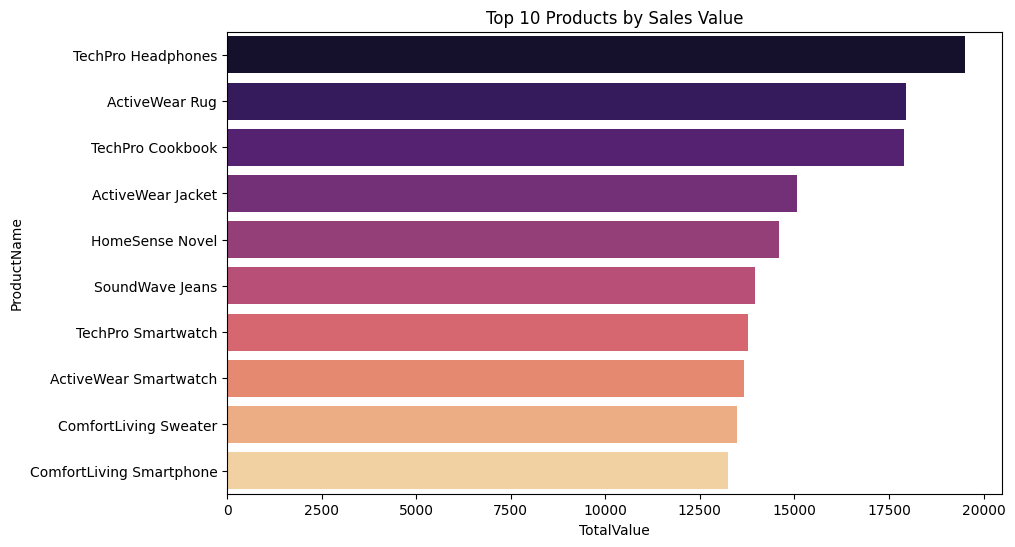

In [22]:
# Example: Top 10 products by total sales value
product_sales = transactions.groupby('ProductID')['TotalValue'].sum().reset_index()
product_sales = product_sales.merge(products, on='ProductID')
top_10_products = product_sales.sort_values('TotalValue', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_products, y='ProductName', x='TotalValue', palette='magma')
plt.title('Top 10 Products by Sales Value')
plt.show()

# Insights (add manually in markdown cells)


In [23]:
# --- Task 2: Lookalike Model ---

# Feature Engineering for Lookalike Model
customer_transactions = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()

customer_features = customers.merge(customer_transactions, on='CustomerID', how='left')
customer_features.fillna(0, inplace=True)

In [24]:
# Normalize Features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['TotalValue', 'Quantity']])


In [25]:
# Calculate Similarity
similarity_matrix = cosine_similarity(scaled_features)
similarity_df = pd.DataFrame(similarity_matrix, index=customer_features['CustomerID'], columns=customer_features['CustomerID'])


In [26]:
# Generate Lookalike Recommendations
lookalike_results = {}
for customer_id in customer_features['CustomerID']:
    similar_customers = similarity_df[customer_id].sort_values(ascending=False)[1:4]
    lookalike_results[customer_id] = [(sim_customer, score) for sim_customer, score in similar_customers.items()]


In [37]:
lookalike_df = lookalike_df.iloc[:, :2]  # Select only the first two columns
lookalike_df.columns = ['CustomerID', 'Lookalikes']  # Rename them


In [38]:
lookalike_df = pd.DataFrame.from_dict(lookalike_results, orient='index').reset_index()


In [39]:
lookalike_df = pd.DataFrame.from_dict(lookalike_results, orient='index').reset_index()


In [44]:
# Combine columns 0, 1, and 2 into a single list for each row
lookalike_df['Lookalikes'] = lookalike_df[[0, 1, 2]].values.tolist()

# Keep only 'index' and the new 'Lookalikes' column
lookalike_df = lookalike_df[['index', 'Lookalikes']]

# Rename columns
lookalike_df.columns = ['CustomerID', 'Lookalikes']

# Save to CSV
lookalike_df.to_csv('FirstName_LastName_Lookalike.csv', index=False)


In [45]:
# --- Task 3: Customer Segmentation ---

# Feature Engineering for Clustering
cluster_features = customer_features[['TotalValue', 'Quantity']]
cluster_features_scaled = scaler.fit_transform(cluster_features)


In [46]:
# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(cluster_features_scaled)


In [47]:
# Evaluate Clustering
db_index = davies_bouldin_score(cluster_features_scaled, customer_features['Cluster'])
silhouette = silhouette_score(cluster_features_scaled, customer_features['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette}")

Davies-Bouldin Index: 0.7102764046737506
Silhouette Score: 0.4539109087769898


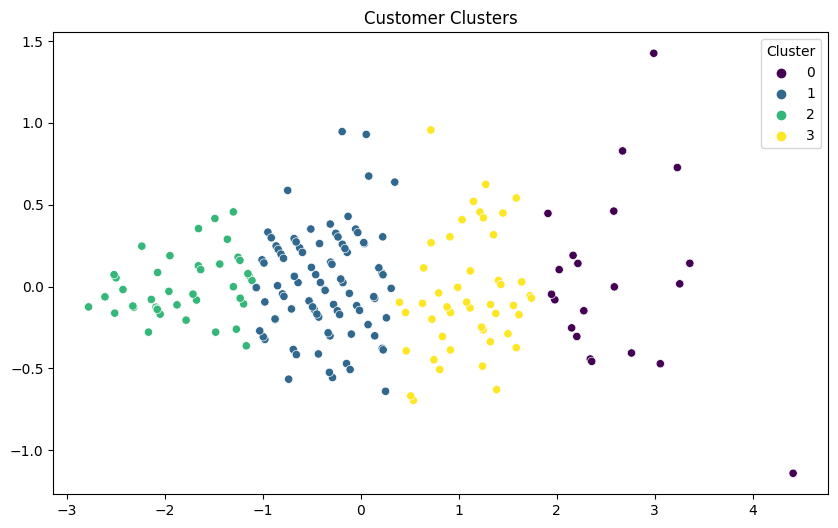

In [48]:
# Visualize Clusters
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(cluster_features_scaled)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=customer_features['Cluster'], palette='viridis')
plt.title('Customer Clusters')
plt.show()

In [49]:
# --- Save Results ---
customer_features.to_csv('FirstName_LastName_Clustering.csv', index=False)